# Convolutional neural networks

In [1]:
import pickle
import numpy as np
import keras
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15533313045890763100
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3402235904
locality {
  bus_id: 1
}
incarnation: 11318804204817027827
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Building AlexNet like

In [23]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, Adamax, Adagrad,RMSprop
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
import numpy as np
import scipy

In [6]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 60

In [7]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

In [9]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
alex_model = Sequential()
alex_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_height, img_width, channel,)))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(2, 2)))

alex_model.add(Conv2D(128, (7, 7), padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(2, 2)))

alex_model.add(Conv2D(192, (3, 3), padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(2, 2)))

alex_model.add(Conv2D(256, (3, 3), padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(1, 1)))

alex_model.add(Flatten())
alex_model.add(Dense(4096))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(Dense(4096))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(Dense(10))
alex_model.add(BatchNormalization())
alex_model.add(Activation('softmax'))

In [11]:
# print the model summary
alex_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       401536    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 128)       0         
__________

In [12]:
# determine Loss function and Optimizer
alex_model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])

## Training

In [13]:
history = alex_model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=2,
            validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
 - 57s - loss: 1.1979 - acc: 0.5976 - val_loss: 1.5996 - val_acc: 0.4813
Epoch 2/60
 - 55s - loss: 0.8333 - acc: 0.7309 - val_loss: 1.1407 - val_acc: 0.6251
Epoch 3/60
 - 55s - loss: 0.6510 - acc: 0.7923 - val_loss: 0.9720 - val_acc: 0.6814
Epoch 4/60
 - 55s - loss: 0.5262 - acc: 0.8327 - val_loss: 1.2196 - val_acc: 0.5995
Epoch 5/60
 - 55s - loss: 0.4067 - acc: 0.8717 - val_loss: 1.1717 - val_acc: 0.6338
Epoch 6/60
 - 55s - loss: 0.3104 - acc: 0.9041 - val_loss: 0.8229 - val_acc: 0.7403
Epoch 7/60
 - 55s - loss: 0.2295 - acc: 0.9310 - val_loss: 0.7757 - val_acc: 0.7564
Epoch 8/60
 - 55s - loss: 0.1683 - acc: 0.9500 - val_loss: 0.8191 - val_acc: 0.7552
Epoch 9/60
 - 55s - loss: 0.1273 - acc: 0.9642 - val_loss: 0.9219 - val_acc: 0.7365
Epoch 10/60
 - 55s - loss: 0.1132 - acc: 0.9668 - val_loss: 0.7755 - val_acc: 0.7824
Epoch 11/60
 - 55s - loss: 0.0858 - acc: 0.9761 - val_loss: 1.0043 - val_acc: 0.7374
Epoch 12/60
 - 55s - los

In [14]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])


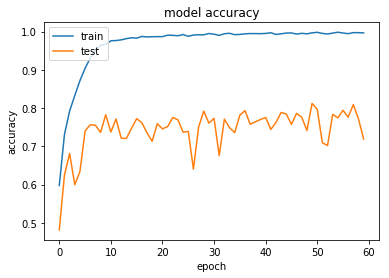

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

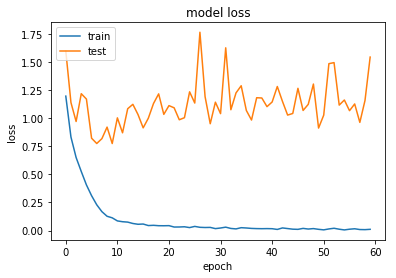

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
score = alex_model.evaluate(x_test, y_test, verbose=0)

In [18]:
print('cv loss:', score[0])

cv loss: 1.5459695719718933


In [19]:
print('cv accuracy:', score[1])

cv accuracy: 0.7191


## Modification AlexNet (improving)

In [76]:
# Hyperparameters
batch_size = 128
epochs = 60

In [77]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [78]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [79]:
# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [80]:
data_augmentation = False
optimizer=Adam()

In [81]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

### Train the Model

In [82]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    workers=4)


Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/60
 - 28s - loss: 1.7409 - acc: 0.4624 - val_loss: 1.1847 - val_acc: 0.6160
Epoch 2/60
 - 26s - loss: 1.1175 - acc: 0.6330 - val_loss: 0.9113 - val_acc: 0.6998
Epoch 3/60
 - 26s - loss: 0.9240 - acc: 0.6965 - val_loss: 0.8192 - val_acc: 0.7358
Epoch 4/60
 - 26s - loss: 0.8236 - acc: 0.7322 - val_loss: 0.7896 - val_acc: 0.7446
Epoch 5/60
 - 26s - loss: 0.7565 - acc: 0.7536 - val_loss: 0.7495 - val_acc: 0.7693
Epoch 6/60
 - 26s - loss: 0.7012 - acc: 0.7756 - val_loss: 0.7230 - val_acc: 0.7694
Epoch 7/60
 - 26s - loss: 0.6563 - acc: 0.7954 - val_loss: 0.6721 - val_acc: 0.7915
Epoch 8/60
 - 26s - loss: 0.6188 - acc: 0.8061 - val_loss: 0.6431 - val_acc: 0.8063
Epoch 9/60
 - 27s - loss: 0.5879 - acc: 0.8199 - val_loss: 0.6197 - val_acc: 0.8119
Epoch 10/60
 - 26s - loss: 0.5613 - acc: 0.8301 - val_loss: 0.6518 - val_acc: 0.8085
Epoch 11/60
 - 26s - loss: 0.5406 - acc: 0.8395 - val_loss: 0.6325 - val_acc: 0.

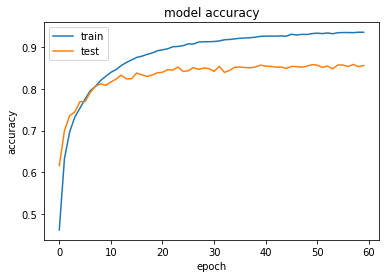

In [83]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

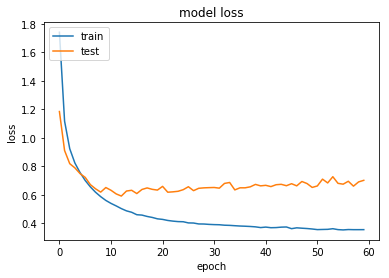

In [84]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test the model

In [85]:
score = model.evaluate(x_test, y_test, verbose=0)

In [86]:
print('cv loss:', score[0])

cv loss: 0.7023254341125488


In [87]:
print('cv accuracy:', score[1])

cv accuracy: 0.8559


## Augmentation. optimizer: Adam()

In [88]:
data_augmentation = True
optimizer=Adam()

In [89]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

### Train the Model

In [90]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    workers=4)


Using real-time data augmentation.
Epoch 1/60
 - 28s - loss: 0.7889 - acc: 0.8020 - val_loss: 0.6852 - val_acc: 0.8343
Epoch 2/60
 - 26s - loss: 0.6962 - acc: 0.8190 - val_loss: 0.6326 - val_acc: 0.8448
Epoch 3/60
 - 26s - loss: 0.6702 - acc: 0.8276 - val_loss: 0.6198 - val_acc: 0.8462
Epoch 4/60
 - 26s - loss: 0.6598 - acc: 0.8289 - val_loss: 0.6028 - val_acc: 0.8553
Epoch 5/60
 - 26s - loss: 0.6520 - acc: 0.8326 - val_loss: 0.6044 - val_acc: 0.8499
Epoch 6/60
 - 26s - loss: 0.6351 - acc: 0.8335 - val_loss: 0.5788 - val_acc: 0.8630
Epoch 7/60
 - 26s - loss: 0.6267 - acc: 0.8377 - val_loss: 0.6010 - val_acc: 0.8476
Epoch 8/60
 - 26s - loss: 0.6209 - acc: 0.8387 - val_loss: 0.5944 - val_acc: 0.8530
Epoch 9/60
 - 26s - loss: 0.6173 - acc: 0.8394 - val_loss: 0.6440 - val_acc: 0.8362
Epoch 10/60
 - 26s - loss: 0.6135 - acc: 0.8391 - val_loss: 0.5771 - val_acc: 0.8535
Epoch 11/60
 - 26s - loss: 0.6055 - acc: 0.8418 - val_loss: 0.5715 - val_acc: 0.8592
Epoch 12/60
 - 26s - loss: 0.6059 - acc

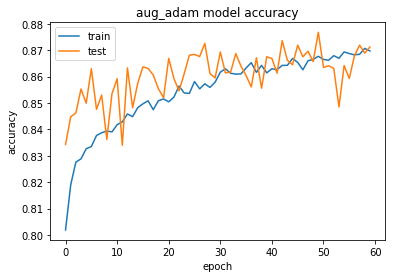

In [91]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('aug_adam model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

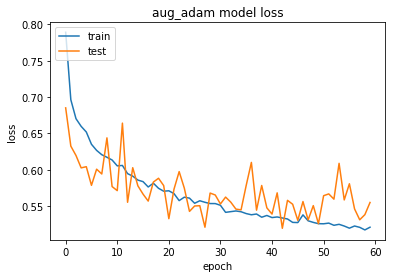

In [92]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('aug_adam model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test the model

In [93]:
aug_adam_score = model.evaluate(x_test, y_test, verbose=0)

In [94]:
print('cv loss:', aug_adam_score[0])

cv loss: 0.5552488811016083


In [95]:
print('cv accuracy:', aug_adam_score[1])

cv accuracy: 0.8712


## Augmentation. optimizer: Adagrad()

In [96]:
data_augmentation = True
optimizer=Adagrad()

In [97]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

### Train the Model

In [98]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    workers=4)


Using real-time data augmentation.
Epoch 1/60
 - 27s - loss: 0.5579 - acc: 0.8586 - val_loss: 0.5277 - val_acc: 0.8739
Epoch 2/60
 - 26s - loss: 0.4885 - acc: 0.8813 - val_loss: 0.4799 - val_acc: 0.8905
Epoch 3/60
 - 26s - loss: 0.4687 - acc: 0.8871 - val_loss: 0.4843 - val_acc: 0.8866
Epoch 4/60
 - 26s - loss: 0.4573 - acc: 0.8904 - val_loss: 0.4779 - val_acc: 0.8912
Epoch 5/60
 - 26s - loss: 0.4503 - acc: 0.8908 - val_loss: 0.4809 - val_acc: 0.8887
Epoch 6/60
 - 26s - loss: 0.4456 - acc: 0.8931 - val_loss: 0.4769 - val_acc: 0.8905
Epoch 7/60
 - 26s - loss: 0.4288 - acc: 0.8972 - val_loss: 0.4722 - val_acc: 0.8920
Epoch 8/60
 - 26s - loss: 0.4249 - acc: 0.8989 - val_loss: 0.4751 - val_acc: 0.8907
Epoch 9/60
 - 27s - loss: 0.4251 - acc: 0.8986 - val_loss: 0.4576 - val_acc: 0.8966
Epoch 10/60
 - 26s - loss: 0.4222 - acc: 0.8996 - val_loss: 0.4835 - val_acc: 0.8870
Epoch 11/60
 - 26s - loss: 0.4140 - acc: 0.9015 - val_loss: 0.4534 - val_acc: 0.8952
Epoch 12/60
 - 26s - loss: 0.4087 - acc

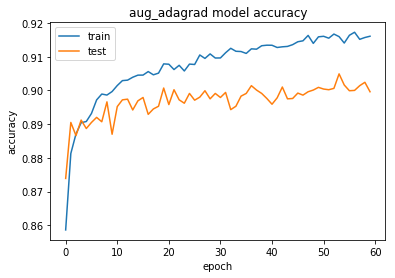

In [99]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('aug_adagrad model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

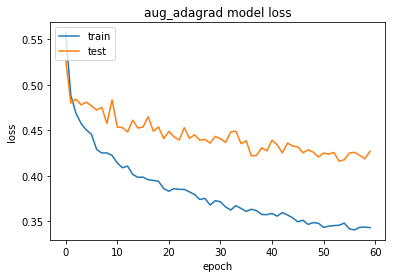

In [100]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('aug_adagrad model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test the model

In [101]:
aug_adagrad_score = model.evaluate(x_test, y_test, verbose=0)

In [102]:
print('cv loss:', aug_adagrad_score[0])

cv loss: 0.4268156979084015


In [103]:
print('cv accuracy:', aug_adagrad_score[1])

cv accuracy: 0.8996


## Augmentation. optimizer: Adamax()

In [104]:
data_augmentation = True
optimizer=Adamax()

In [105]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

### Train the Model

In [106]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    workers=4)


Using real-time data augmentation.
Epoch 1/60
 - 27s - loss: 0.4097 - acc: 0.8925 - val_loss: 0.4674 - val_acc: 0.8867
Epoch 2/60
 - 26s - loss: 0.4071 - acc: 0.8925 - val_loss: 0.4604 - val_acc: 0.8879
Epoch 3/60
 - 26s - loss: 0.4128 - acc: 0.8923 - val_loss: 0.4839 - val_acc: 0.8793
Epoch 4/60
 - 26s - loss: 0.4112 - acc: 0.8929 - val_loss: 0.4665 - val_acc: 0.8855
Epoch 5/60
 - 26s - loss: 0.4160 - acc: 0.8913 - val_loss: 0.4670 - val_acc: 0.8849
Epoch 6/60
 - 26s - loss: 0.4165 - acc: 0.8896 - val_loss: 0.4520 - val_acc: 0.8886
Epoch 7/60
 - 26s - loss: 0.4180 - acc: 0.8905 - val_loss: 0.4927 - val_acc: 0.8809
Epoch 8/60
 - 26s - loss: 0.4128 - acc: 0.8921 - val_loss: 0.4755 - val_acc: 0.8811
Epoch 9/60
 - 26s - loss: 0.4130 - acc: 0.8924 - val_loss: 0.5116 - val_acc: 0.8713
Epoch 10/60
 - 26s - loss: 0.4146 - acc: 0.8919 - val_loss: 0.4695 - val_acc: 0.8823
Epoch 11/60
 - 26s - loss: 0.4200 - acc: 0.8899 - val_loss: 0.4463 - val_acc: 0.8908
Epoch 12/60
 - 26s - loss: 0.4167 - acc

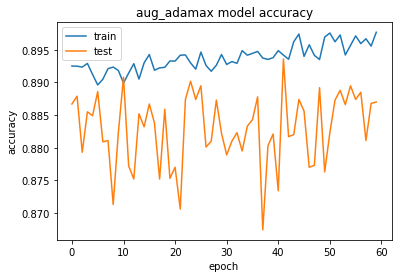

In [107]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('aug_adamax model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

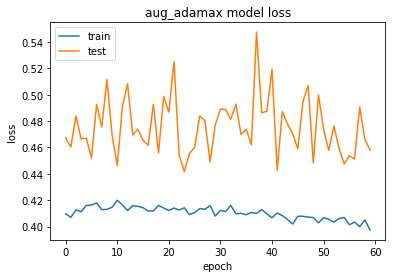

In [108]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('aug_adamax model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test the model

In [109]:
aug_adamax_score = model.evaluate(x_test, y_test, verbose=0)

In [110]:
print('cv loss:', aug_adamax_score[0])

cv loss: 0.45804503889083864


In [111]:
print('cv accuracy:', aug_adamax_score[1])

cv accuracy: 0.887


## Augmentation. optimizer: RMSprop()

In [112]:
data_augmentation = True
optimizer=RMSprop()

In [113]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

### Train the Model

In [114]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    workers=4)


Using real-time data augmentation.
Epoch 1/60
 - 27s - loss: 0.4521 - acc: 0.8802 - val_loss: 0.5064 - val_acc: 0.8776
Epoch 2/60
 - 26s - loss: 0.4612 - acc: 0.8791 - val_loss: 0.4726 - val_acc: 0.8825
Epoch 3/60
 - 26s - loss: 0.4627 - acc: 0.8784 - val_loss: 0.5250 - val_acc: 0.8689
Epoch 4/60
 - 26s - loss: 0.4684 - acc: 0.8779 - val_loss: 0.5567 - val_acc: 0.8603
Epoch 5/60
 - 26s - loss: 0.4743 - acc: 0.8770 - val_loss: 0.5644 - val_acc: 0.8569
Epoch 6/60
 - 26s - loss: 0.4753 - acc: 0.8781 - val_loss: 0.6025 - val_acc: 0.8491
Epoch 7/60
 - 26s - loss: 0.4754 - acc: 0.8779 - val_loss: 0.5362 - val_acc: 0.8717
Epoch 8/60
 - 26s - loss: 0.4809 - acc: 0.8776 - val_loss: 0.5204 - val_acc: 0.8745
Epoch 9/60
 - 26s - loss: 0.4806 - acc: 0.8770 - val_loss: 0.5136 - val_acc: 0.8733
Epoch 10/60
 - 26s - loss: 0.4833 - acc: 0.8771 - val_loss: 0.5806 - val_acc: 0.8589
Epoch 11/60
 - 26s - loss: 0.4809 - acc: 0.8788 - val_loss: 0.4837 - val_acc: 0.8862
Epoch 12/60
 - 26s - loss: 0.4839 - acc

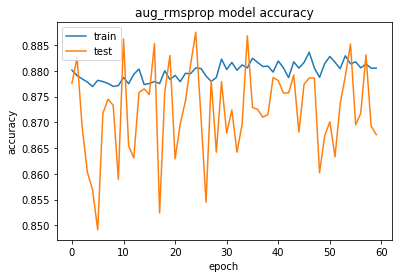

In [115]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('aug_rmsprop model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

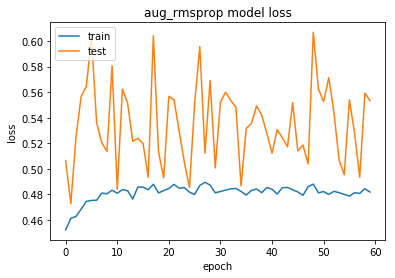

In [116]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('aug_rmsprop model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test the model

In [117]:
aug_rmsprop_score = model.evaluate(x_test, y_test, verbose=0)

In [118]:
print('cv loss:', aug_rmsprop_score[0])

cv loss: 0.5532749287128449


In [119]:
print('cv accuracy:', aug_rmsprop_score[1])

cv accuracy: 0.8676
